# A Brief Introduction to Matplotlib
### Powered by Pandas!

In this notebook, we will cover the basics of Matplotlib, a powerful, prolific library 
for organizing and visualizing data of all kinds. If you work in science, chances are you'll
find a use case for this. Enjoy!

To start, let's import pyplot from Matplotlib.

In [2]:
import matplotlib.pyplot as plt

Now, let's make our first plot - a line graph! We're going to visualize data related to CO2 emissions.

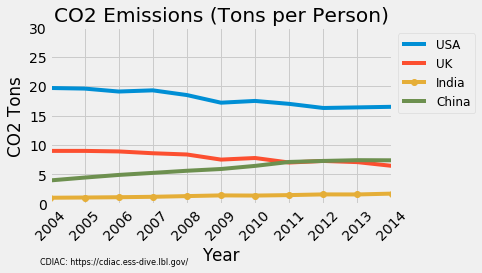

In [4]:
# Set the plot style
plt.style.use('fivethirtyeight')

# Years covered by the data
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

# Emissions data for USA
us_emissions = [19.7, 19.6, 19.1, 19.3, 18.5, 17.2, 17.5, 17, 16.3, 16.4, 16.5]
plt.plot(years, us_emissions, label='USA')

# Emissions data for UK
uk_emissions = [9, 9, 8.91, 8.6, 8.39, 7.52, 7.79, 7.02, 7.29, 7.09, 6.46]
plt.plot(years, uk_emissions, label='UK')

# Emissions data for India
india_emissions = [1.03, 1.07, 1.12, 1.19, 1.31, 1.43, 1.4, 1.48, 1.6, 1.59, 1.73]
plt.plot(years, india_emissions, marker="o", label='India')

# Emissions data for China
china_emissions = [3.98, 4.46, 4.91, 5.26, 5.62, 5.92, 6.45, 7.12, 7.29, 7.42, 7.4]
plt.plot(years, china_emissions, label='China')

# Add style to the x ticks
plt.xticks(ticks=years, labels=years, rotation=45)

# Change scaling for y axis
plt.axis([2004, 2014, 0, 30])

# Add labels
plt.xlabel('Year')
plt.ylabel('CO2 Tons')
plt.title('CO2 Emissions (Tons per Person)')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1), prop={'size': 12})

# Ensure a tight, uncluttered layout
plt.tight_layout()

# Save the figure
plt.savefig('./out/co2_plot1.png')
plt.savefig('./out/co2_plot2.jpg')
plt.savefig('./out/co2_plot3.svg')

# Annotate with source
# Placement of annotation is fraction of the axes coordinate system
# Placement of text is an offset in points
plt.annotate('CDIAC: https://cdiac.ess-dive.lbl.gov/', (0,0), (-10,-60), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points')

# Show the figure
plt.show()

Great! We've got our first plot. Let's keep working with this data and see if we can   
rank the top producers emitters of CO2, using a bar chart. But let's not write in our   
data by hand. Let's download a file from a URL and work with it locally.

First, let's import the requests package (another ).

In [ ]:
import requests

In [57]:
# URL of data
url = 'https://raw.githubusercontent.com/andymbryant/matplotlib-demo/master/co2_emissions_per_capita.csv'

# Make a request, allowing for redirects
r = requests.get(url, allow_redirects=True)

# open the file in 'write binary' mode
# this file does not exist, so it will be created
file = open('co2_emissions_per_capita.csv', 'wb')

# write the content from the request object to that file
file.write(r.content)

# be sure to close the file!
file.close()

Good! We've got the file. Now we need to work with it. Let's use vanilla python to start.  
Because this is a csv document, we'll need the csv package. 

In [6]:
import csv

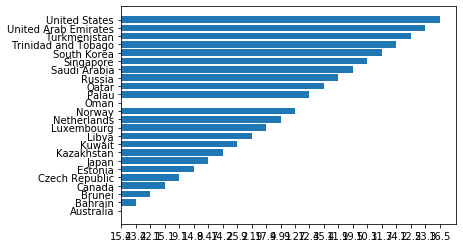

In [9]:
# Initialize our lists
countries = []
emission_levels = []

# Open file and read it using the csv package
with open('co2_emissions_per_capita.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
  
    # Loop through the rows
    # If emissions values for 2014 are greater than 9, append them to the lists
    for row in csv_reader:
        if float(row['2014']) > 9:
            countries.append(row['country'])
            emission_levels.append(row['2014'])

# Plot the data using a bar graph
plt.barh(countries, emission_levels)

# Show the plot
plt.show()

Hmmm... something's not right. This plot might work in the short-term, but when we try and improve it, it falls apart pretty quickly. Pandas to the rescue!  

Pandas is an open-source Python library. It has a number of high-performance, easy-to-use data structures, specifically designed for data analysis. Let's take a look.

In [11]:
import pandas as pd

In [53]:
df1 = pd.DataFrame(
    [['Jan',58,42,74,22,2.95],
     ['Feb',61,45,78,26,3.02],
     ['Mar',65,48,84,25,2.34],
     ['Apr',67,50,92,28,1.02],
     ['May',71,53,98,35,0.48],
     ['Jun',75,56,107,41,0.11],
     ['Jul',77,58,105,44,0.0],
     ['Aug',77,59,102,43,0.03],
     ['Sep',77,57,103,40,0.17],
     ['Oct',73,54,96,34,0.81],
     ['Nov',64,48,84,30,1.7],
     ['Dec',58,42,73,21,2.56]],
    columns = ['month','avg_high','avg_low','record_high','record_low','avg_precipitation'])

df1.head()

df1.tail()

df1.min()
df['record_low'].max()

df.sample(n=4)

df2 = pd.DataFrame(
    [['Jan',65,40,80,22,3.1],
     ['Feb',65,45,41,29,3.09],
     ['Mar',61,48,98,35,2.84],
     ['Apr',60,54,91,38,1.84],
     ['May',74,43,90,45,0.9],
     ['Jun',77,55,101,51,0.19],
     ['Jul',78,54,100,52,0.2],
     ['Aug',74,52,109,49,0.45],
     ['Sep',72,52,101,42,0.87],
     ['Oct',77,59,91,44,0.32],
     ['Nov',66,51,80,65,1.8],
     ['Dec',52,40,74,25,2.9]],
    columns = ['month','avg_high','avg_low','record_high','record_low','avg_precipitation'])

df1.gt(df2)

44

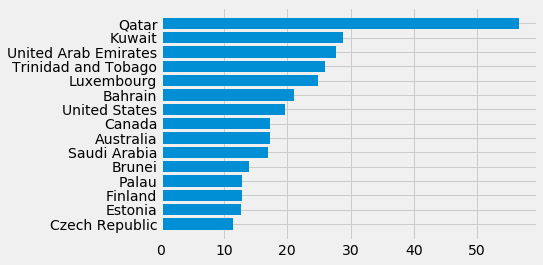

In [54]:
# Declare the year
year = '2004'

# Read in the data, using pandas
dataframe = pd.read_csv('co2_emissions_per_capita.csv')

# Filter the data
dataframe = dataframe.nlargest(15, year).sort_values(year)

# Plot the data, using dataframes
plt.barh(dataframe['country'], dataframe[year])

# Show the plot
plt.show()

In [59]:
# URL of data
url = 'https://raw.githubusercontent.com/andymbryant/matplotlib-demo/master/co2_emissions_by_year.csv'

# Make a request, allowing for redirects
r = requests.get(url, allow_redirects=True)

# open the file in 'write binary' mode
# this file does not exist, so it will be created
file = open('co2_emissions_by_year.csv', 'wb')

# write the content from the request object to that file
file.write(r.content)

# be sure to close the file!
file.close()

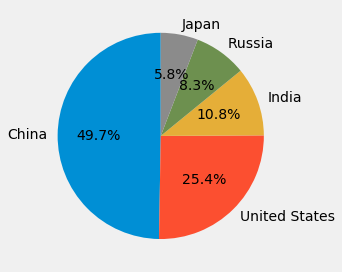

In [55]:
# Declare the year
year = '2014'

# Read in the data, using pandas
df = pd.read_csv('co2_emissions_by_year.csv')

# Filter the data
df = df.nlargest(5, year)

# Plot the data with a pie chart
# No shadow, string formatting as percentage
plt.pie(df[year], labels=df['country'], shadow=False, startangle=90, autopct='%1.1f%%')

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

Looking good! Now for a bonus: let's play around with NumPy and figures in Matplotlib.

In [57]:
import numpy as np

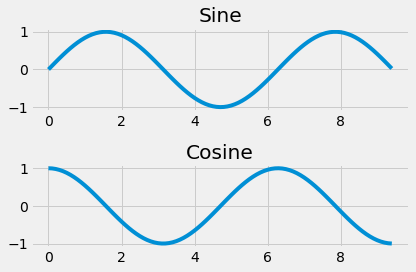

In [61]:
# Compute the x and y coordinates for points on sine and cosine curves 
x = np.arange(0, 3 * np.pi, 0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
   
# Set up a subplot grid that has height 2 and width 1, 
# and set the first such subplot as active. 
plt.subplot(2, 1, 1)
   
# Make the first plot 
plt.plot(x, y_sin) 
plt.title('Sine')  
   
# Set the second subplot as active, and make the second plot. 
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  

# Ensure tight layout
plt.tight_layout()
   
# Show the figure. 
plt.show()